In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import MLP Regressor from sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Display plots inline
%matplotlib inline


In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Convert it into a DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target variable to the DataFrame
df['target'] = diabetes.target

# Display the first few rows
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
# Define X (features) and y (target)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
X_train.shape, X_test.shape


((353, 10), (89, 10))

In [6]:
# Initialize MLP Regressor with increased iterations and reduced learning rate
mlp_model = MLPRegressor(random_state=42, max_iter=5000, learning_rate_init=0.001, alpha=0.01, hidden_layer_sizes=(100,))

# Train the model on the training data
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)



C:\Users\no34fic.FSUJENA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
# Initialize MLP Regressor with early stopping, more iterations, and verbose output
mlp_model = MLPRegressor(random_state=42, max_iter=5000, learning_rate_init=0.001, 
                         alpha=0.01, hidden_layer_sizes=(100,), early_stopping=True, 
                         validation_fraction=0.1, n_iter_no_change=10, verbose=True)

# Train the model on the training data
mlp_model.fit(X_train, y_train)

# Print the number of iterations the model used
print(f'The model converged after {mlp_model.n_iter_} iterations.')

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)



Iteration 1, loss = 14758.21165544
Validation score: -3.548411
Iteration 2, loss = 14753.38146783
Validation score: -3.546986
Iteration 3, loss = 14748.49048004
Validation score: -3.545554
Iteration 4, loss = 14743.66226206
Validation score: -3.544112
Iteration 5, loss = 14738.81611879
Validation score: -3.542659
Iteration 6, loss = 14733.90307344
Validation score: -3.541197
Iteration 7, loss = 14728.95826164
Validation score: -3.539726
Iteration 8, loss = 14723.96532345
Validation score: -3.538244
Iteration 9, loss = 14718.90609219
Validation score: -3.536753
Iteration 10, loss = 14713.82320975
Validation score: -3.535245
Iteration 11, loss = 14708.82300368
Validation score: -3.533720
Iteration 12, loss = 14703.56861205
Validation score: -3.532185
Iteration 13, loss = 14698.35231361
Validation score: -3.530634
Iteration 14, loss = 14693.05097948
Validation score: -3.529067
Iteration 15, loss = 14687.73117586
Validation score: -3.527484
Iteration 16, loss = 14682.34105549
Validation sc

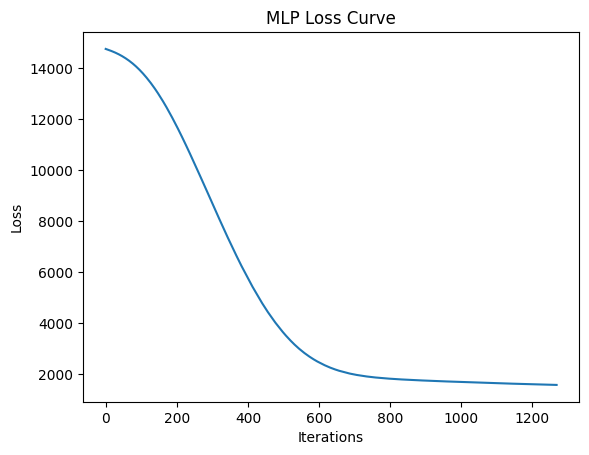

In [9]:
# Plot the loss curve to check convergence
plt.plot(mlp_model.loss_curve_)
plt.title('MLP Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


In [11]:
# Initialize MLP Regressor with adjusted max_iter based on convergence results and early stopping
mlp_model = MLPRegressor(random_state=42, max_iter=1500, learning_rate_init=0.001, 
                         alpha=0.01, hidden_layer_sizes=(100,), early_stopping=True, 
                         validation_fraction=0.1, n_iter_no_change=10, tol=0.0001)

# Train the model on the training data
mlp_model.fit(X_train, y_train)

# Print the number of iterations the model used
print(f'The model converged after {mlp_model.n_iter_} iterations.')

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)


The model converged after 1269 iterations.


In [12]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 3050.3557823867227
R-squared (R²): 0.42426039736578447


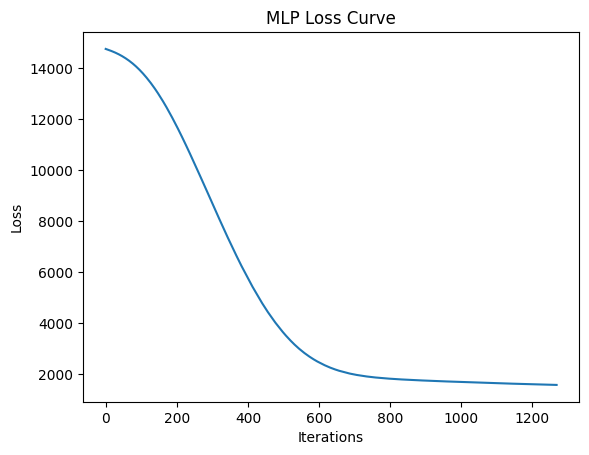

In [13]:
# Plot the loss curve to check convergence
plt.plot(mlp_model.loss_curve_)
plt.title('MLP Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


In [15]:
# Initialize lists to store results
hidden_layer_sizes_values = [(50,), (100,), (50, 50), (100, 100)]
activation_values = ['relu', 'tanh', 'logistic']
learning_rate_values = ['constant', 'adaptive']
alpha_values = [0.0001, 0.001, 0.01]

mse_hidden_layer_results = []
mse_activation_results = []
mse_lr_results = []
mse_alpha_results = []

# Loop through different hidden_layer_sizes values
for hidden_layer in hidden_layer_sizes_values:
    mlp_model = MLPRegressor(hidden_layer_sizes=hidden_layer, random_state=42, max_iter=1500, 
                             early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)
    mlp_model.fit(X_train, y_train)
    y_pred = mlp_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_hidden_layer_results.append(mse)

# Loop through different activation values
for activation in activation_values:
    mlp_model = MLPRegressor(activation=activation, random_state=42, max_iter=1500, 
                             early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)
    mlp_model.fit(X_train, y_train)
    y_pred = mlp_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_activation_results.append(mse)

# Loop through different learning_rate values
for lr in learning_rate_values:
    mlp_model = MLPRegressor(learning_rate=lr, random_state=42, max_iter=1500, 
                             early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)
    mlp_model.fit(X_train, y_train)
    y_pred = mlp_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_lr_results.append(mse)

# Loop through different alpha values
for alpha in alpha_values:
    mlp_model = MLPRegressor(alpha=alpha, random_state=42, max_iter=1500, 
                             early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)
    mlp_model.fit(X_train, y_train)
    y_pred = mlp_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_alpha_results.append(mse)

# Print results for hidden_layer_sizes
print("Hidden Layer Sizes Results:")
for i, hidden_layer in enumerate(hidden_layer_sizes_values):
    print(f"hidden_layer_sizes={hidden_layer}: MSE = {mse_hidden_layer_results[i]}")

# Print results for activation
print("\nActivation Function Results:")
for i, activation in enumerate(activation_values):
    print(f"activation={activation}: MSE = {mse_activation_results[i]}")

# Print results for learning_rate
print("\nLearning Rate Results:")
for i, lr in enumerate(learning_rate_values):
    print(f"learning_rate={lr}: MSE = {mse_lr_results[i]}")

# Print results for alpha
print("\nAlpha (Regularization Term) Results:")
for i, alpha in enumerate(alpha_values):
    print(f"alpha={alpha}: MSE = {mse_alpha_results[i]}")


C:\Users\no34fic.FSUJENA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\no34fic.FSUJENA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden Layer Sizes Results:
hidden_layer_sizes=(50,): MSE = 3298.873478044672
hidden_layer_sizes=(100,): MSE = 3050.3059186519677
hidden_layer_sizes=(50, 50): MSE = 2960.4664177251652
hidden_layer_sizes=(100, 100): MSE = 3087.380562617648

Activation Function Results:
activation=relu: MSE = 3050.3059186519677
activation=tanh: MSE = 3276.6778746360587
activation=logistic: MSE = 3991.6019146507665

Learning Rate Results:
learning_rate=constant: MSE = 3050.3059186519677
learning_rate=adaptive: MSE = 3050.3059186519677

Alpha (Regularization Term) Results:
alpha=0.0001: MSE = 3050.3059186519677
alpha=0.001: MSE = 3050.3017167614676
alpha=0.01: MSE = 3050.3557823867227


The model converged after 3000 iterations.


C:\Users\no34fic.FSUJENA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


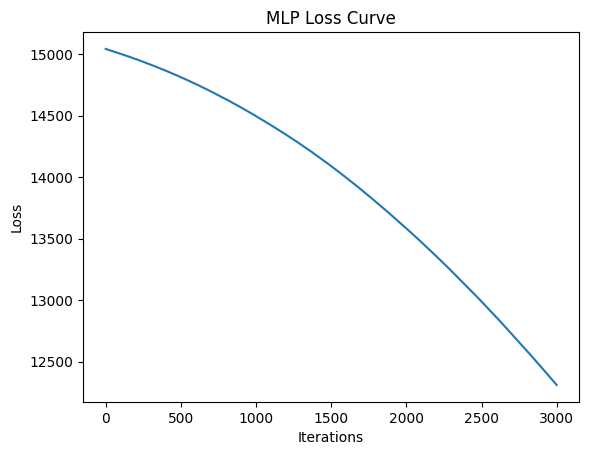

In [16]:
# Adjust MLP Regressor with lower learning rate and increased alpha for regularization
mlp_model = MLPRegressor(random_state=42, max_iter=3000, learning_rate_init=0.0001, 
                         alpha=0.1, hidden_layer_sizes=(50,), early_stopping=True, 
                         validation_fraction=0.1, n_iter_no_change=10)

# Train the model
mlp_model.fit(X_train, y_train)

# Print the number of iterations the model used
print(f'The model converged after {mlp_model.n_iter_} iterations.')

# Make predictions
y_pred = mlp_model.predict(X_test)

# Plot the loss curve to check convergence
plt.plot(mlp_model.loss_curve_)
plt.title('MLP Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


In [ ]:
# Initialize lists to store results
hidden_layer_sizes_values = [(50,), (100,), (50, 50), (100, 100)]
learning_rate_values = [0.0001, 0.001, 0.01]
alpha_values = [0.0001, 0.001, 0.01]
activation_values = ['relu', 'tanh', 'logistic']

mse_results = []

# Loop through different parameter combinations
for hidden_layer in hidden_layer_sizes_values:
    for learning_rate in learning_rate_values:
        for alpha in alpha_values:
            for activation in activation_values:
                mlp_model = MLPRegressor(hidden_layer_sizes=hidden_layer, learning_rate_init=learning_rate, 
                                         alpha=alpha, activation=activation, random_state=42, max_iter=3000, 
                                         early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)
                
                # Train the model
                mlp_model.fit(X_train, y_train)
                
                # Make predictions
                y_pred = mlp_model.predict(X_test)
                
                # Calculate and store MSE
                mse = mean_squared_error(y_test, y_pred)
                mse_results.append((hidden_layer, learning_rate, alpha, activation, mse))

# Print the best parameter combination
best_params = min(mse_results, key=lambda x: x[4])
print(f"Best Parameters: {best_params[0]} hidden layers, {best_params[1]} learning rate, {best_params[2]} alpha, {best_params[3]} activation")
print(f"Best MSE: {best_params[4]}")


C:\Users\no34fic.FSUJENA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\no34fic.FSUJENA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\no34fic.FSUJENA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\no34fic.FSUJENA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Ma